# Importing Libraries and Tools

In [299]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Image Loading and Processing

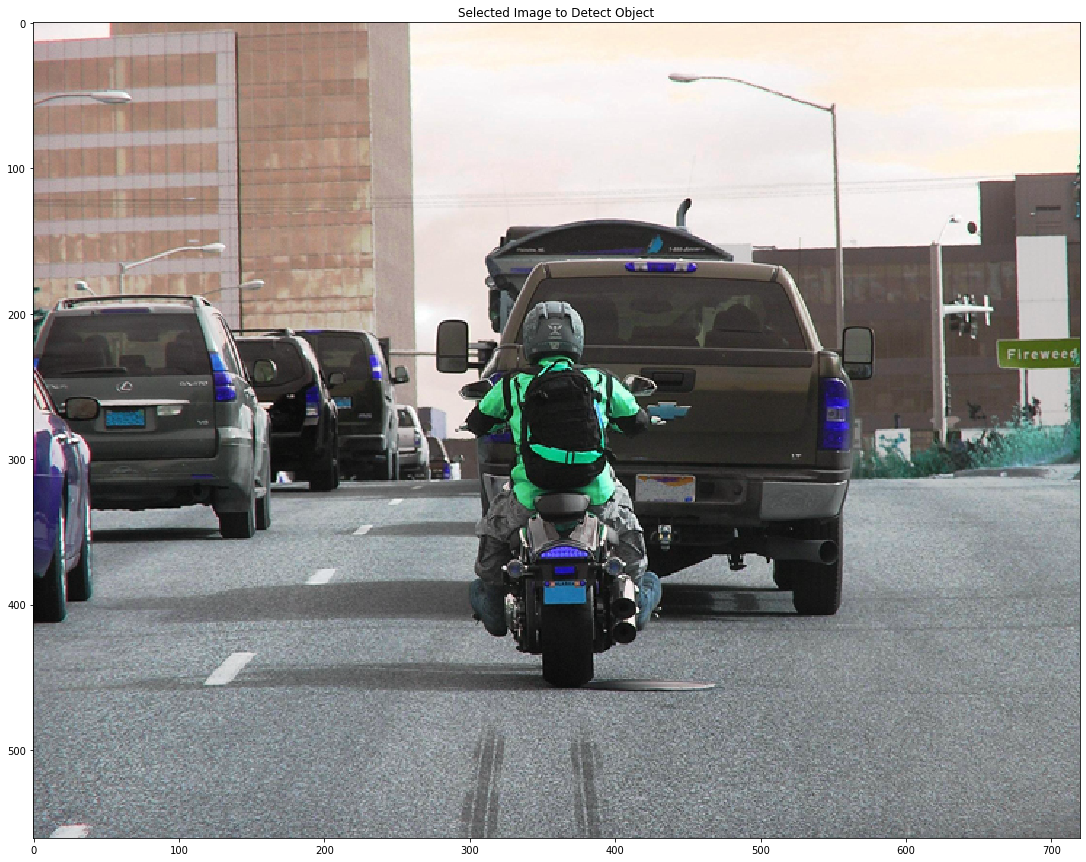

In [316]:
img = cv2.imread("E:/Jobs/YOLO/testing/scene2.jpg")
plt.title("Selected Image to Detect Object")
plt.imshow(img)

In [317]:
img_H = img.shape[0]

In [318]:
img_W = img.shape[1]

In [319]:
# Converting to the blob
img_blob = cv2.dnn.blobFromImage(img, 0.003922, (416, 416), swapRB=True, crop=False)

In [320]:
# 80 class labels of COCO dataset 

class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]

# Color Composition of Bounding Boxes

In [321]:
# Color compositions of Bounding boxes for all 80 classes

class_colors = ["0,255,0","0,0,255","255,0,0","255,255,0","0,255,255"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(16,1))


# Loading pre-trained model

In [322]:
yolo_model = cv2.dnn.readNetFromDarknet('E:/Jobs/YOLO/yolov3.cfg','E:/Jobs/YOLO/yolov3.weights')

In [323]:
# Getting all layers of the YOLO model
yolo_layers = yolo_model.getLayerNames()
# Getting the output layer of the model
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

In [324]:
#print(yolo_layers)

# Input to the model

In [325]:
# Inputting the preprocessed data
yolo_model.setInput(img_blob)

In [326]:
# obtain the detection layers
obj_detection_layers = yolo_model.forward(yolo_output_layer)

In [327]:
#obj_detection_layers

In [328]:
class_ids_list = []
boxes_list = []
confidences_list = []

In [329]:
# Loop over each of the layer output
for object_detection_layer in obj_detection_layers:
	# loop over the detections
    for object_detection in object_detection_layer:        
        # 1 to 4 => will have the two center points, box width and box height
        # [5:] => will have scores for all objects within bounding box
        all_scores = object_detection
        #print(all_scores)
        #print(all_scores.shape)
        all_scores = object_detection[5:]
        #print (all_scores)
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id]
    
        # considering confidence more than 50%
        if prediction_confidence > 0.50:
            # get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            
            # obtain the bounding box co-oridnates for actual image from resized image size
            bounding_box = object_detection[0:4] * np.array([img_W, img_H, img_W, img_H])
            (box_center_x, box_center_y, box_width, box_height) = bounding_box.astype("int")
            start_x = int(box_center_x - (box_width / 2))
            start_y = int(box_center_y - (box_height / 2))
            
            #save class id, start x, y, width & height, confidences in a list for nms processing
            class_ids_list.append(predicted_class_id)
            confidences_list.append(float(prediction_confidence))
            boxes_list.append([start_x, start_y, int(box_width), int(box_height)])
            
            
#print(all_scores.shape)

In [330]:
len(class_ids_list)
#boxes_list

29

In [331]:
max_value_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, 0.5, 0.4)

for max_valueid in max_value_ids:
    max_class_id = max_valueid[0]
    box = boxes_list[max_class_id]
    start_x = box[0]
    start_y = box[1]
    box_W = box[2]
    box_H = box[3]
    
    #get the predicted class id and label
    
    predicted_class_id = class_ids_list[max_class_id]
    predicted_class_label = class_labels[predicted_class_id]
    prediction_confidence = confidences_list[max_class_id]
           
    end_x = start_x + box_W
    end_y = start_y + box_H
    
    # get a random color from the numpy array of colors
    box_color = class_colors[predicted_class_id]
    
    # convert the color numpy array as a list and apply to text and box
    box_color = [int(c) for c in box_color]
    
    # print the prediction in console
    predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
    print("predicted object - {}".format(predicted_class_label))
    
    # draw rectangle and text in the image
    cv2.rectangle(img, (start_x, start_y), (end_x, end_y), box_color, 2)
    cv2.putText(img, predicted_class_label, (start_x, start_y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

predicted object - car: 99.14%
predicted object - person: 98.43%
predicted object - car: 97.37%
predicted object - car: 95.33%
predicted object - motorcycle: 91.93%
predicted object - car: 87.79%
predicted object - truck: 82.44%


# Visualizing of Object Detection

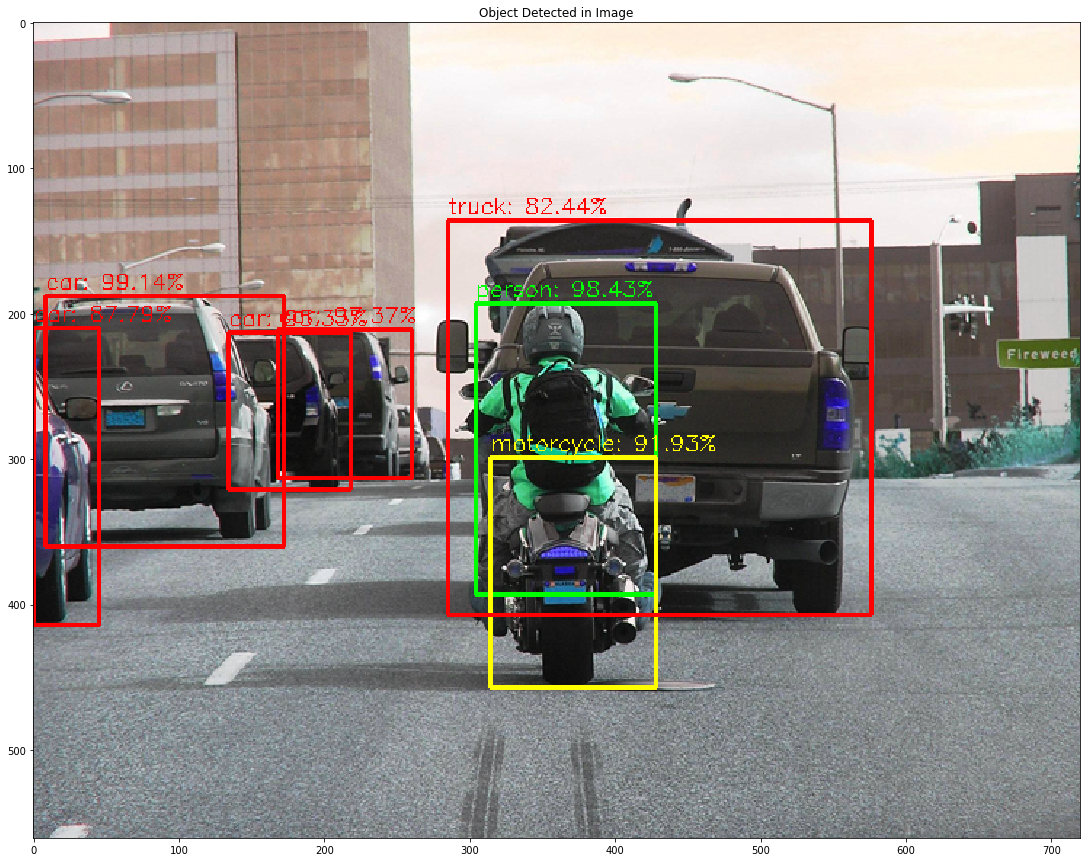

In [332]:
plt.rcParams["figure.figsize"] = (20,15)
plt.title("Object Detected in Image")
plt.imshow(img)